importing

In [1]:
import pandas as pd #importing python library pandas(data manipulation and analysis)
import seaborn as sns #data visualization library
from sklearn import preprocessing #transforming raw data to useful data for machine learning algorithms
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle

Loading the dataset to df

In [2]:
df=pd.read_csv(r'C:\Users\risha\Downloads\archive (1)\diamonds.csv')

print(df)


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Rows and columns

In [4]:
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [5]:
print(df['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [6]:
print(df['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [7]:
df.shape

(53940, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Statistical Imformation

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Removing faulty values

In [10]:
#From the above we got the x,y,z min value as 0 which states that diamond's dimensionlessness.we have to remove them
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

PairPlot

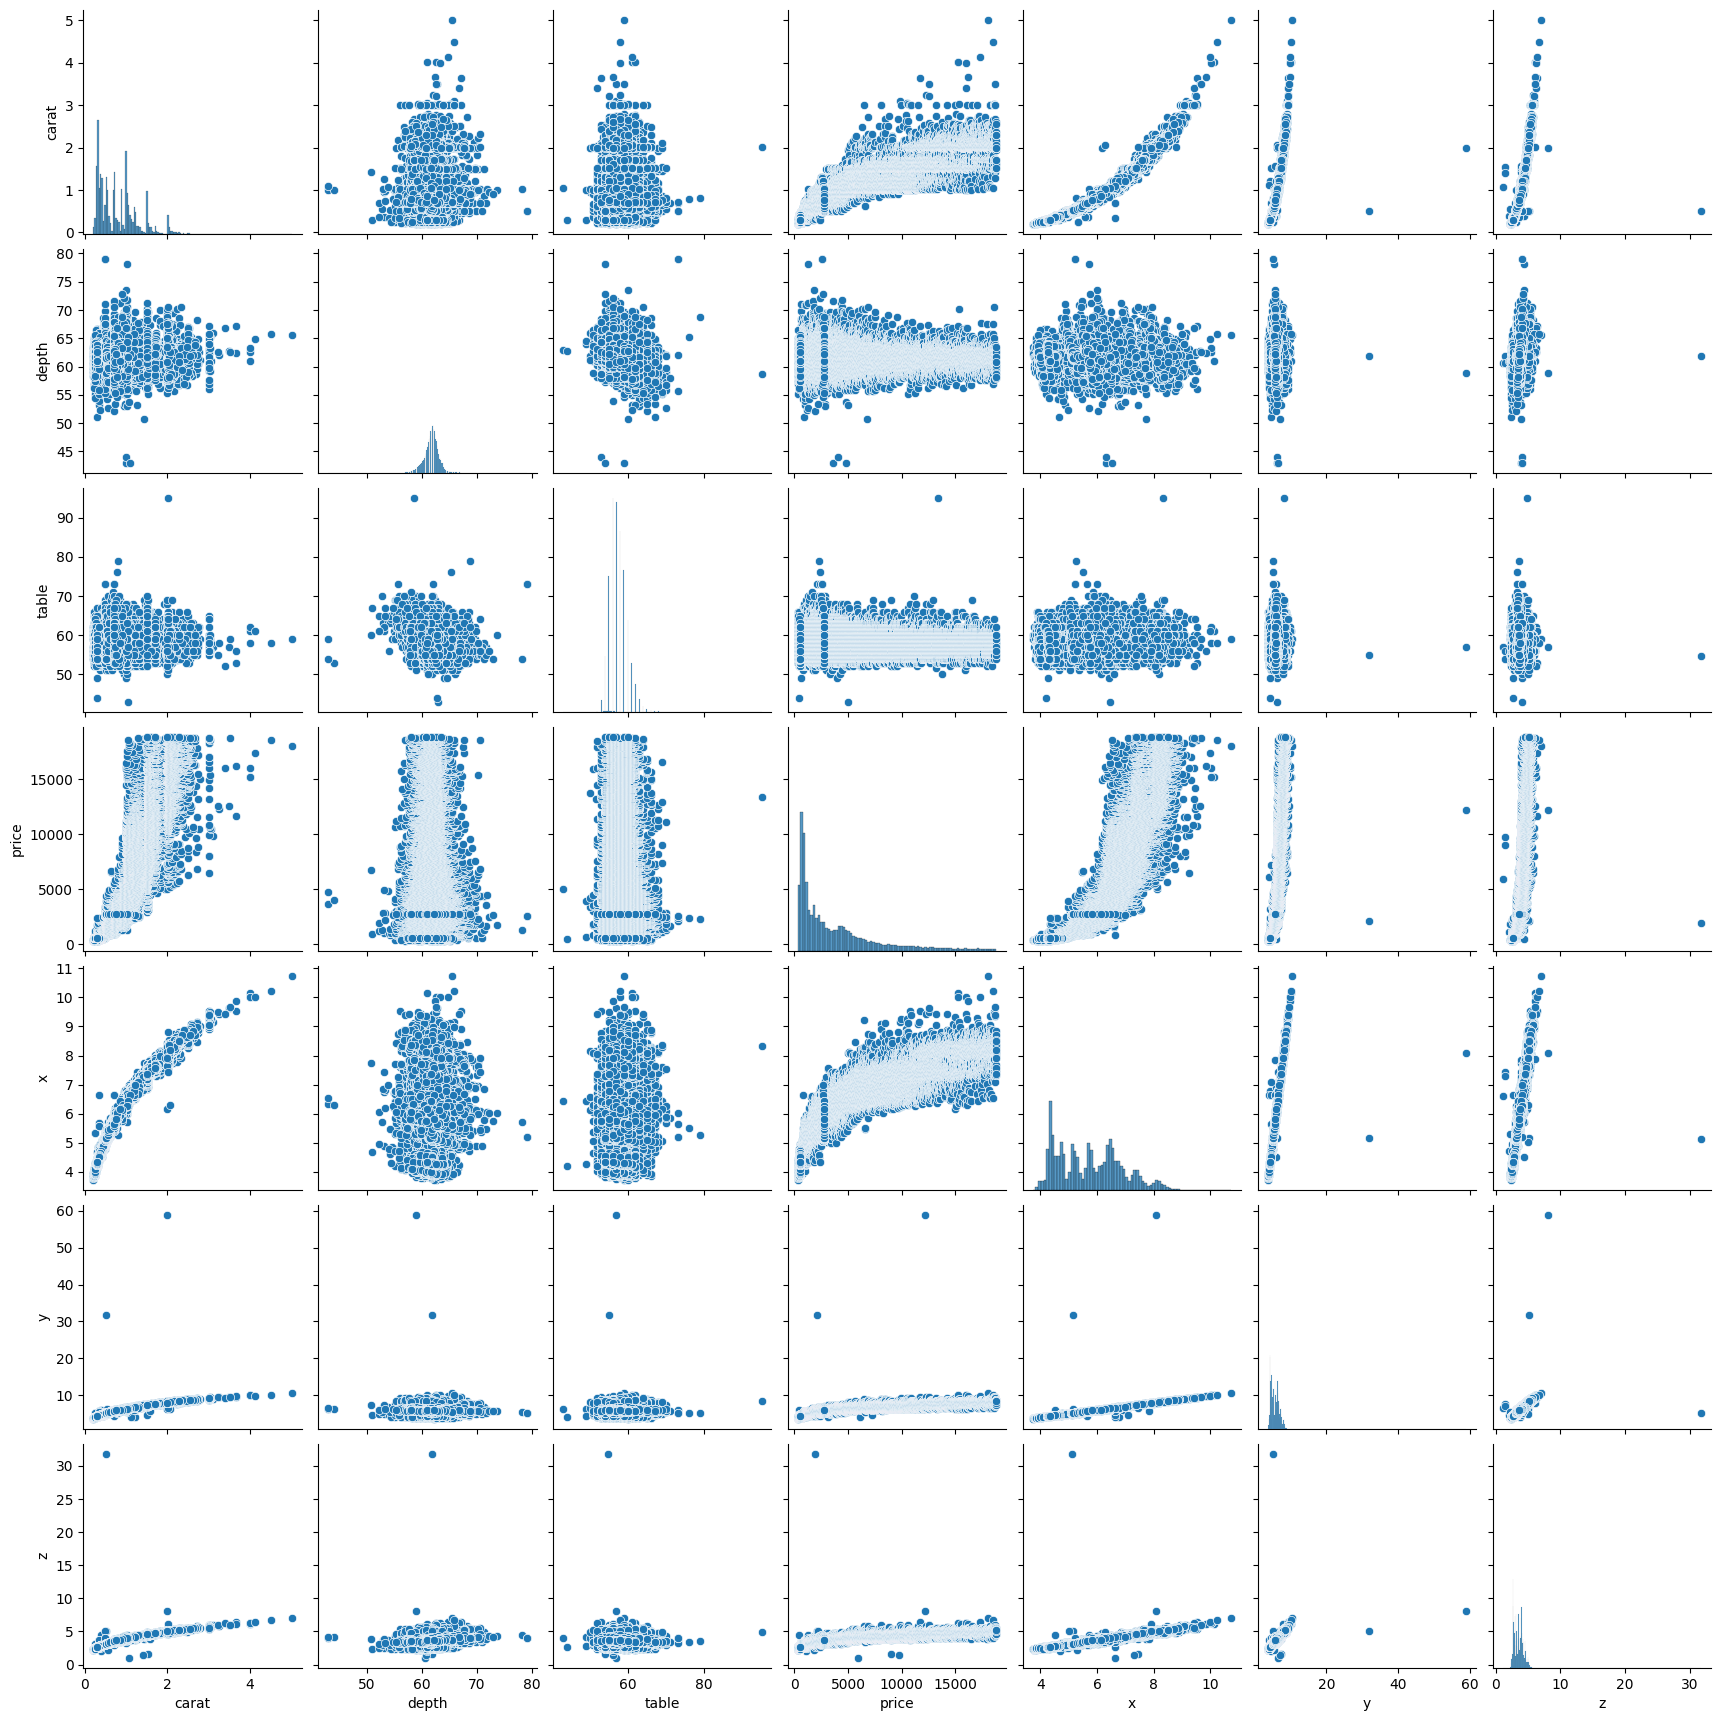

In [11]:
sns.pairplot(df)

To see outlierrs clearly

[Text(0.5, 1.0, 'price vs y')]

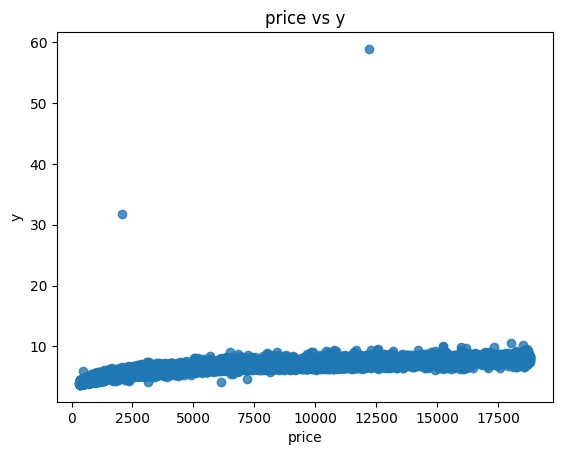

In [12]:
sns.regplot(x="price", y="y", data=df, fit_reg=True).set(title="price vs y")

[Text(0.5, 1.0, 'price vs z')]

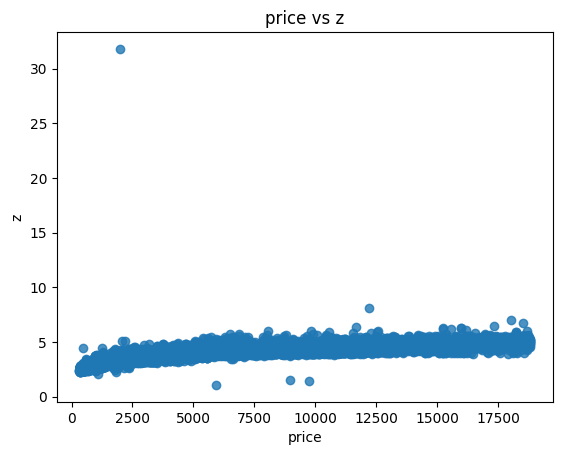

In [13]:
sns.regplot(x="price", y="z", data=df, fit_reg=True).set(title="price vs z")

[Text(0.5, 1.0, 'price vs depth')]

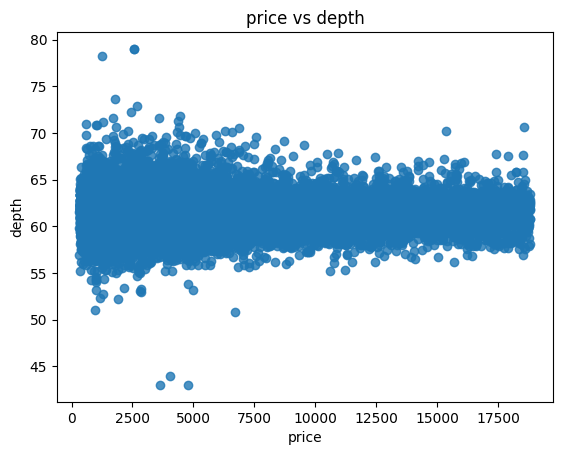

In [14]:
sns.regplot(x="price", y="depth", data=df, fit_reg=True).set(title="price vs depth")

[Text(0.5, 1.0, 'price vs table')]

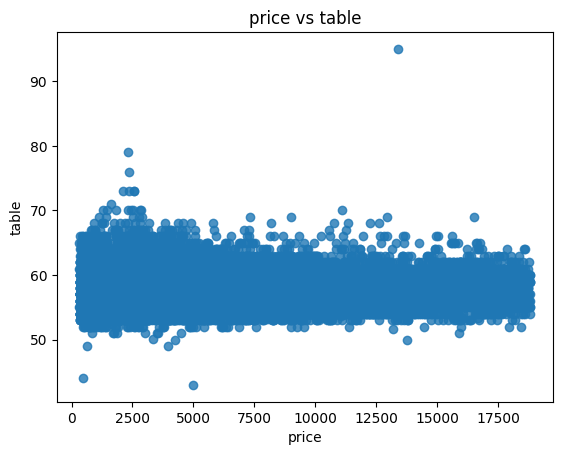

In [15]:
sns.regplot(x="price", y="table", data=df, fit_reg=True).set(title="price vs table")

Removing outliers

In [16]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

In [17]:
df.to_csv('cleaned.csv')

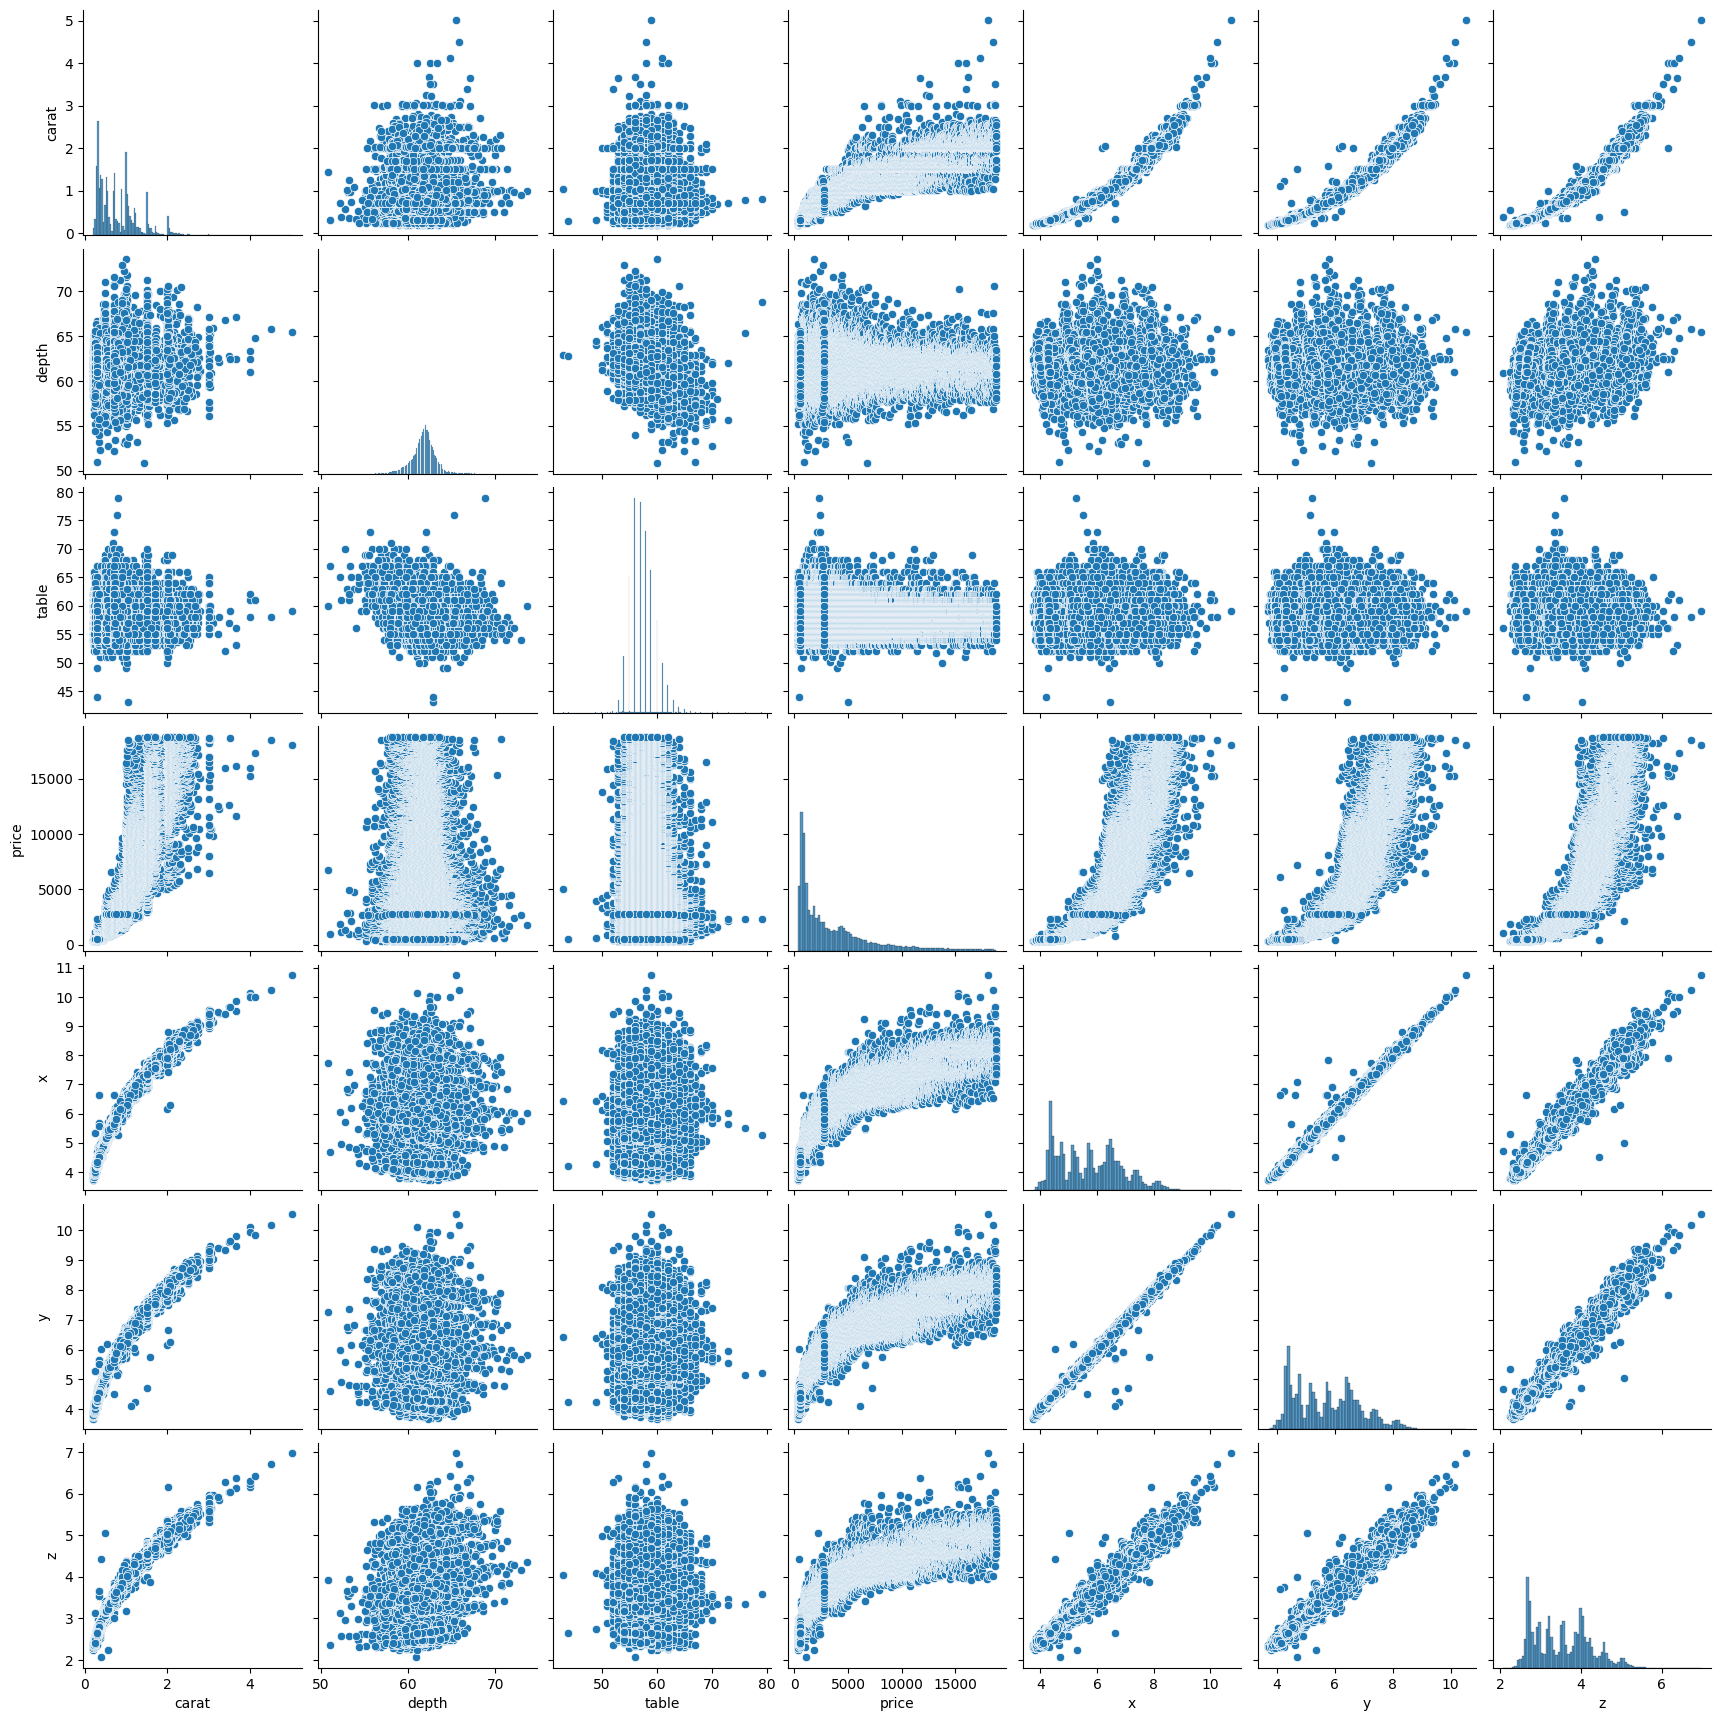

In [18]:
sns.pairplot(df)

datatypes

In [19]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Find and printing the categorical columns

In [20]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


LabelEncoding


In [21]:
le=preprocessing.LabelEncoder()
df['cut']=le.fit_transform(df['cut'])
df['clarity']=le.fit_transform(df['clarity'])
df['color']=le.fit_transform(df['color'])

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot: >

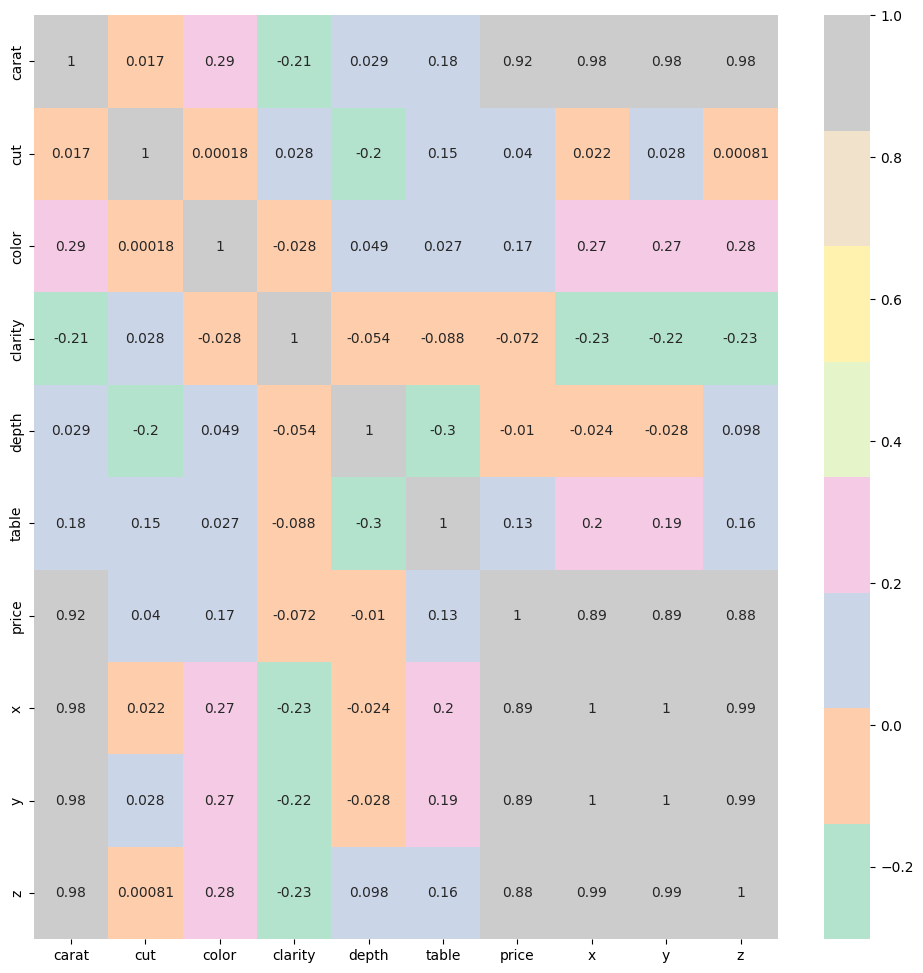

In [23]:
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

separating x and y 


In [24]:
x= df.iloc[:,[0,1,2,3,4,5,7,8,9]]
print(x)
y=df.iloc[:,6]
print(y)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53907 rows x 9 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53907, 

Splitting

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

Model Training

In [26]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
26764,1.69,3,2,5,58.7,59.0,7.87,7.78,4.59
44666,0.36,2,5,5,61.8,55.0,4.60,4.63,2.85
29023,0.31,2,3,7,60.8,56.0,4.41,4.44,2.69
25603,2.08,3,4,3,58.8,60.0,8.39,8.35,4.92
29363,0.31,3,3,5,61.5,59.0,4.35,4.33,2.67
...,...,...,...,...,...,...,...,...,...
23051,1.01,2,0,7,62.3,53.0,6.40,6.47,4.02
9532,1.17,2,6,2,62.1,57.0,6.74,6.81,4.21
25045,0.30,4,2,2,63.5,57.0,4.27,4.24,2.70
10260,1.01,3,1,3,61.5,58.0,6.43,6.40,3.95


In [27]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
52667,0.78,4,2,3,62.2,59.0,5.89,5.94,3.68
50365,0.70,1,0,3,63.6,62.0,5.61,5.55,3.55
14297,1.23,4,5,5,59.7,58.0,6.94,7.02,4.17
18513,1.20,2,3,5,61.9,56.0,6.86,6.81,4.23
47365,0.69,1,5,4,61.6,61.9,5.65,5.68,3.48
...,...,...,...,...,...,...,...,...,...
11293,1.00,4,4,5,60.7,60.0,6.55,6.49,3.96
44758,0.59,4,0,2,62.9,58.0,5.31,5.34,3.35
38183,0.41,3,0,2,61.4,58.0,4.78,4.76,2.93
860,0.90,3,6,2,62.8,59.0,6.13,6.03,3.82


Model Building

In [28]:
rndm=RandomForestRegressor()
rndm.fit(x,y)


RandomForestRegressor()

In [29]:
# Perform cross validation and get the scores
k=20
rndm_scores = cross_val_score(rndm, x, y, cv=k, scoring="neg_mean_squared_error")


In [30]:
rndm_avg_score = sum(rndm_scores) / 20

In [31]:
print(f"The average mean squared error across {k} folds is {rndm_avg_score:.2f}")

The average mean squared error across 10 folds is -1099427.97


In [32]:
xgb=XGBRegressor()
xgb.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
# Perform cross validation and get the scores
k=10
xgb_scores = cross_val_score(xgb, x, y, cv=k, scoring="neg_mean_squared_error")

In [34]:
xgb_avg_score = sum(xgb_scores) / 10

In [35]:
print(f"The average mean squared error across {k} folds is {xgb_avg_score:.2f}")

The average mean squared error across 10 folds is -789023.71


Applying the model to make the prediction

In [36]:
pred =xgb.predict(x_test)
pred

array([15520.369 ,   586.9787,   786.7738, ...,   611.4742,  4478.8735,
       16837.494 ], dtype=float32)

Evaluating model performance

In [37]:
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("R^2:",metrics.r2_score(y_test, pred))

MAE: 224.49399999846025
MSE: 171684.6990218578
R^2: 0.988955627964308


In [38]:
print(le.classes_)

['D' 'E' 'F' 'G' 'H' 'I' 'J']


In [39]:
print(df['cut'].unique())

[2 3 1 4 0]


In [40]:
print(le.transform(['D', 'E', 'F', 'G', 'H', 'I', 'J']))

[0 1 2 3 4 5 6]


In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [42]:
xgb.predict(pd.DataFrame([[0.50,2,1,3,61.5,55.0,3.95,3.98,2.43]],columns=[['carat','cut','color','clarity','depth','table','x','y','z']]))

array([598.4767], dtype=float32)

In [43]:
pickle.dump(xgb,open('XGBRegressionModel.pkl','wb'))